In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.cluster import KMeans
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import google.datalab.storage as storage
import pandas as pd
from io import BytesIO
import google.datalab.storage as storage

In [29]:
!gsutil cp 'gs://sales_data_123/sales.csv' ./

Copying gs://sales_data_123/sales.csv...
/ [1 files][  4.2 KiB/  4.2 KiB]                                                
Operation completed over 1 objects/4.2 KiB.                                      


In [30]:
df = pd.read_csv('sales.csv') 
df.head(10)

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [31]:
df.isnull().any().any()

False

In [6]:
df.drop(["CustomerID"], axis = 1, inplace=True)
# plt.figure(figsize=(9,4))
# plt.title("Ages Frequency")
# sns.axes_style("dark")
# sns.violinplot(y=df["Age"])
# plt.show()

In [6]:
# plt.figure(figsize=(10,4))
# plt.subplot(1,2,1)
# sns.boxplot(y=df["Spending"], color="red")
# plt.subplot(1,2,2)
# sns.boxplot(y=df["Income"])
# plt.show()

In [7]:
genders = df.Gender.value_counts()

df["Gender_male"] = df.Gender.apply(lambda x: 0 if x == "Male" else 1)
df["Gender_female"] = df.Gender.apply(lambda x: 0 if x == "Female" else 1)

df.drop(["Gender"], axis = 1, inplace=True)
# sns.set_style("darkgrid")
# plt.figure(figsize=(10,4))
# sns.barplot(x=genders.index, y=genders.values)
# plt.show()

In [8]:
df.head(5)

,Age,Income,Spending,Gender_male,Gender_female
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


In [9]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

# x = ["18-25","26-35","36-45","46-55","55+"]
# y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

# plt.figure(figsize=(10,4))
# sns.barplot(x=x, y=y, palette="rocket")
# plt.title("Number of Customer and Ages")
# plt.xlabel("Age")
# plt.ylabel("Number of Customer")
# plt.show()

In [41]:
ss1_20 = df["Spending"][(df["Spending"] >= 1) & (df["Spending"] <= 20)]
ss21_40 = df["Spending"][(df["Spending"] >= 21) & (df["Spending"] <= 40)]
ss41_60 = df["Spending"][(df["Spending"] >= 41) & (df["Spending"] <= 60)]
ss61_80 = df["Spending"][(df["Spending"] >= 61) & (df["Spending"] <= 80)]
ss81_100 = df["Spending"][(df["Spending"] >= 81) & (df["Spending"] <= 100)]
# ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
# ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

# plt.figure(figsize=(10,4))
# sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
# plt.title("Spending Scores")
# plt.xlabel("Score")
# plt.ylabel("Number of Customer Having the Score")
# plt.show()

In [42]:
ai0_30 = df["Income"][(df["Income"] >= 0) & (df["Income"] <= 30)]
ai31_60 = df["Income"][(df["Income"] >= 31) & (df["Income"] <= 60)]
ai61_90 = df["Income"][(df["Income"] >= 61) & (df["Income"] <= 90)]
ai91_120 = df["Income"][(df["Income"] >= 91) & (df["Income"] <= 120)]
ai121_150 = df["Income"][(df["Income"] >= 121) & (df["Income"] <= 150)]
# aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
# aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]
# plt.figure(figsize=(10,4))
# sns.barplot(x=aix, y=aiy, palette="Set2")
# plt.title("Income of customer")
# plt.xlabel("Income")
# plt.ylabel("Number of Customer")
# plt.show()

In [11]:
#from mpl_toolkits.mplot3d import Axes3D

# sns.set_style("white")
# fig = plt.figure(figsize=(20,10))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(df.Age, df["Income"], df["Spending"], c='blue', s=60)
# ax.view_init(30, 185)
# plt.xlabel("Age")
# plt.ylabel("Income")
# ax.set_zlabel('Spending')
# plt.show()

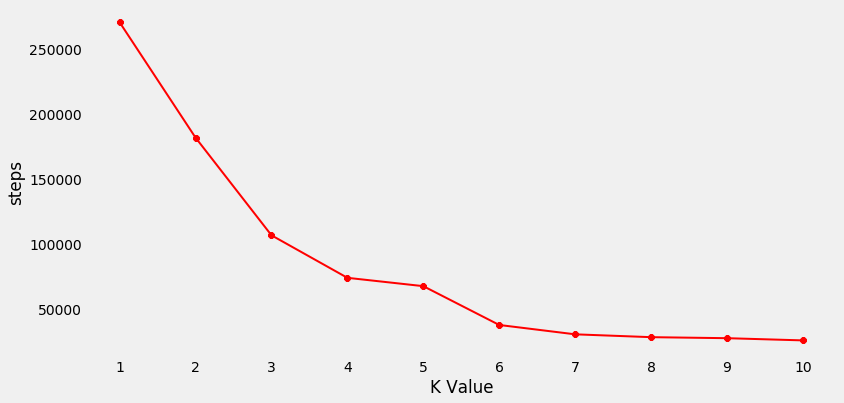

In [12]:
tester = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    tester.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),tester, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("steps")
plt.show()

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

km = KMeans(n_clusters=5)
clusters = km.fit_predict(df)
df["label"] = clusters

In [16]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import pickle

# km = KMeans(n_clusters=5)
# clusters = km.fit_predict(df.iloc[:,1:])
# df["label"] = clusters

df = df.replace({'label':{ 0:"Senior Employee", 1:"Employee" , 2: "Less risk taker",3:"Money Saver", 4:"Investors"}})

# import joblib
# joblib.dump(km, 'model.joblib')



with open('model.pkl', 'wb') as model_file:
  pickle.dump(km, model_file)

# fig = plt.figure(figsize=(20,10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df.Age[df.label == 0], df["Income"][df.label == 0], df["Spending"][df.label == 0], c='blue', s=60) # Senior Employee
# ax.scatter(df.Age[df.label == 1], df["Income"][df.label == 1], df["Spending"][df.label == 1], c='red', s=60) # Employee
# ax.scatter(df.Age[df.label == 2], df["Income"][df.label == 2], df["Spending"][df.label == 2], c='green', s=60) # Students
# ax.scatter(df.Age[df.label == 3], df["Income"][df.label == 3], df["Spending"][df.label == 3], c='orange', s=60) # Retired
# ax.scatter(df.Age[df.label == 4], df["Income"][df.label == 4], df["Spending"][df.label == 4], c='purple', s=60) # Investors
# ax.view_init(30, 185)
# plt.xlabel("Age")
# plt.ylabel("Income")# ax.set_zlabel('Spending')
# plt.show()

In [48]:
df

,Age,Income,Spending,Gender_male,Gender_female,label
0,19,15,39,0,1,Employee
1,21,15,81,0,1,Employee
2,20,16,6,1,0,Money Saver
3,23,16,77,1,0,Employee
4,31,17,40,1,0,Money Saver
5,22,17,76,1,0,Employee
6,35,18,6,1,0,Money Saver
7,23,18,94,1,0,Employee
8,64,19,3,0,1,Money Saver
9,30,19,72,1,0,Employee


In [49]:
df = df.replace({'label':{ 0:"Senior Employee", 1:"Employee" , 2: "Less risk taker",3:"Money Saver", 4:"Investors"}})
df.head(5)

,Age,Income,Spending,Gender_male,Gender_female,label
0,19,15,39,0,1,Employee
1,21,15,81,0,1,Employee
2,20,16,6,1,0,Money Saver
3,23,16,77,1,0,Employee
4,31,17,40,1,0,Money Saver


In [52]:
df.to_csv('results.csv', index = False)
!gsutil cp 'results.csv' 'gs://sales_data_123'

Copying file://results.csv [Content-Type=text/csv]...
/ [1 files][  5.0 KiB/  5.0 KiB]                                                
Operation completed over 1 objects/5.0 KiB.                                      


In [51]:
!gsutil cp ./model.pkl gs://sales_data_123/model.pkl

Copying file://./model.pkl [Content-Type=application/octet-stream]...
/ [1 files][  1.6 KiB/  1.6 KiB]                                                
Operation completed over 1 objects/1.6 KiB.                                      
